<a href="https://colab.research.google.com/github/mayank-liv/Coursera_Capstone/blob/master/BOTN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Libraries**

In [0]:
#WE IMPORT ALL THE LIBRARIES WE'LL NEED, FIRST

import matplotlib.pyplot as plt

In [0]:
#pandas and numpy will help work with our data in a dataframe
import pandas as pd
import numpy as np
 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

#folium is going to help us show our data in the map
import folium

#json will help us process the json files we get
import json

#this will help us get latitude and longitude coordinates of a place
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import json
import requests
from pandas.io.json import json_normalize

In [4]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium import plugins

from bs4 import BeautifulSoup

# Module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

/bin/bash: conda: command not found
/bin/bash: conda: command not found


# **2. Importing data, and cleaning it**

In [27]:
#import the crime dataset

cnames=['ARREST_KEY','ARREST_DATE','PD_DESC','OFNS_DESC','ARREST_BORO', 'Latitude', 'Longitude'] #we only need these columns

!wget -O crimes.csv https://data.cityofnewyork.us/resource/8h9b-rp9u.json




--2019-06-21 21:22:38--  https://data.cityofnewyork.us/resource/8h9b-rp9u.json
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/json]
Saving to: ‘crimes.csv’

crimes.csv              [  <=>               ] 445.30K  1.66MB/s    in 0.3s    

2019-06-21 21:22:39 (1.66 MB/s) - ‘crimes.csv’ saved [455990]



In [0]:
df=pd.read_csv('https://data.cityofnewyork.us/api/views/8h9b-rp9u/rows.csv?accessType=DOWNLOAD', usecols=cnames)

In [29]:
df.shape

(4798339, 7)

In [30]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,Latitude,Longitude
0,173130602,12/31/2017,"MARIJUANA, POSSESSION",MISCELLANEOUS PENAL LAW,Q,40.735772,-73.715638
1,173114463,12/31/2017,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,Q,40.769437,-73.910241
2,173113513,12/31/2017,"NY STATE LAWS,UNCLASSIFIED VIOLATION",OTHER STATE LAWS,K,40.679525,-73.904572
3,173113423,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,40.763523,-73.987074
4,173113421,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,40.759768,-73.989811


In [0]:
#ARREST_BORO had only initials of the borough names. We changed that back to the full names

dd=df.replace({'ARREST_BORO': {'B':'Bronx', 'S':'Staten Island', 'K':'Brooklyn', 'M':'Manhattan', 'Q':'Queens'}})

In [32]:
#this dataframe has the data of all crime records in NYC over the last 10 years

dd.head(10)


,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,Latitude,Longitude
0,173130602,12/31/2017,"MARIJUANA, POSSESSION",MISCELLANEOUS PENAL LAW,Queens,40.735772,-73.715638
1,173114463,12/31/2017,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,Queens,40.769437,-73.910241
2,173113513,12/31/2017,"NY STATE LAWS,UNCLASSIFIED VIOLATION",OTHER STATE LAWS,Brooklyn,40.679525,-73.904572
3,173113423,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.763523,-73.987074
4,173113421,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.759768,-73.989811
5,173130583,12/31/2017,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,Brooklyn,40.684194,-73.916085
6,173129349,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.722199,-73.977122
7,173128438,12/31/2017,"CONTROLLED SUBSTANCE, POSSESSION 7",DANGEROUS DRUGS,Manhattan,40.799683,-73.944112
8,173128437,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.787496,-73.949752
9,173128433,12/31/2017,"FORGERY,ETC.-MISD.",OFFENSES INVOLVING FRAUD,Manhattan,40.750107,-73.974936


In [33]:
dd.dtypes   #helps us find the types of data

ARREST_KEY       int64
ARREST_DATE     object
PD_DESC         object
OFNS_DESC       object
ARREST_BORO     object
Latitude       float64
Longitude      float64
dtype: object

In [34]:
dd.isna().sum()   #we find if there's any missing data

ARREST_KEY        0
ARREST_DATE       0
PD_DESC        8870
OFNS_DESC      8870
ARREST_BORO       8
Latitude          1
Longitude         1
dtype: int64

In [35]:
#cleaning the dataframe

dd.dropna(inplace=True)

dd.reindex()

dd.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,Latitude,Longitude
0,173130602,12/31/2017,"MARIJUANA, POSSESSION",MISCELLANEOUS PENAL LAW,Queens,40.735772,-73.715638
1,173114463,12/31/2017,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,Queens,40.769437,-73.910241
2,173113513,12/31/2017,"NY STATE LAWS,UNCLASSIFIED VIOLATION",OTHER STATE LAWS,Brooklyn,40.679525,-73.904572
3,173113423,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.763523,-73.987074
4,173113421,12/31/2017,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.759768,-73.989811


In [36]:
dd.isna().sum()

ARREST_KEY     0
ARREST_DATE    0
PD_DESC        0
OFNS_DESC      0
ARREST_BORO    0
Latitude       0
Longitude      0
dtype: int64

In [0]:
#convert the object type column into a format we prefer

dd['ARREST_DATE'] =  pd.to_datetime(dd['ARREST_DATE'], format='%m/%d/%Y')

In [38]:
dd.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,Latitude,Longitude
0,173130602,2017-12-31,"MARIJUANA, POSSESSION",MISCELLANEOUS PENAL LAW,Queens,40.735772,-73.715638
1,173114463,2017-12-31,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,Queens,40.769437,-73.910241
2,173113513,2017-12-31,"NY STATE LAWS,UNCLASSIFIED VIOLATION",OTHER STATE LAWS,Brooklyn,40.679525,-73.904572
3,173113423,2017-12-31,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.763523,-73.987074
4,173113421,2017-12-31,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.759768,-73.989811


In [0]:
#creating separate columns for Month, Day and Year


dd['Name_of_day'] = dd['ARREST_DATE'].dt.day_name()
dd['Day'] = dd['ARREST_DATE'].dt.dayofweek +1
dd['Name_of_month'] = dd['ARREST_DATE'].dt.month_name()
dd['Month'] = dd['ARREST_DATE'].dt.month
dd['Year'] = dd['ARREST_DATE'].dt.year


In [0]:
dd.to_csv("crimes10yrs.csv", index=False)

In [41]:
dd.isna().sum()

ARREST_KEY       0
ARREST_DATE      0
PD_DESC          0
OFNS_DESC        0
ARREST_BORO      0
Latitude         0
Longitude        0
Name_of_day      0
Day              0
Name_of_month    0
Month            0
Year             0
dtype: int64

In [42]:
from google.colab import files

files.upload()

{}

In [0]:
#this dataset is for only 2017's record of crimes, and has the time parameter too. So we'll use it later to get the relation between time and crime

col2=['CMPLNT_NUM', 'CMPLNT_FR_TM']

df2=pd.read_csv('NYC_crime.csv', usecols=col2)

In [0]:
df2['CMPLNT_FR_TM'] =  pd.to_datetime(df2['CMPLNT_FR_TM'], format='%H:%M:%S')

In [0]:
df2['hour'] = df2['CMPLNT_FR_TM'].dt.hour

In [46]:
df2.head()

,CMPLNT_NUM,CMPLNT_FR_TM,hour
0,403250906,1900-01-01 00:01:00,0
1,235290134,1900-01-01 12:00:00,12
2,563999853,1900-01-01 20:40:00,20
3,877956688,1900-01-01 00:00:00,0
4,505910152,1900-01-01 20:11:00,20


In [0]:
df2.to_csv("crimes1yr.csv", index=False)

# **3. Visualising the data in the form of charts**

## a) **Month-wise spread of crimes**

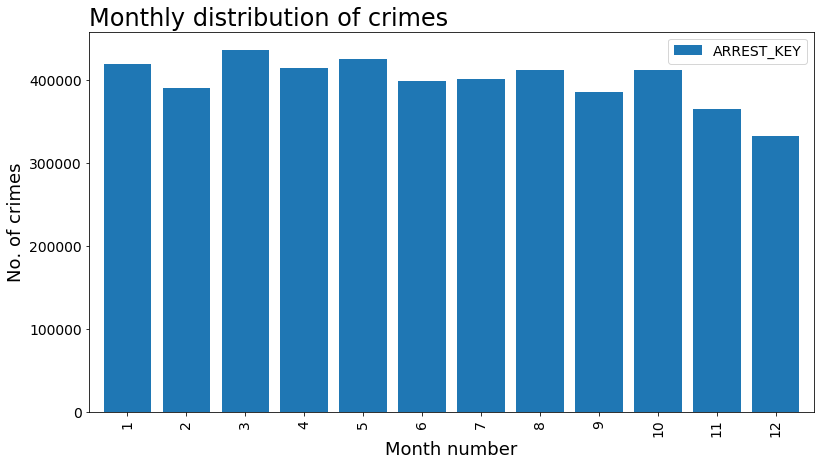

In [48]:
#We group the crimes according to the months, and analyse the month-wise spread of data

dd.groupby('Month').count().plot(y = 'ARREST_KEY', 
                                      kind='bar',
                                      figsize=(13,7),
                                      width=0.80,
                                      fontsize=14,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 14})

plt.xlabel('Month number', fontsize=18)
plt.ylabel('No. of crimes', fontsize= 18)
plt.title('Monthly distribution of crimes', loc='left', fontsize=24)

plt.savefig('Fig1.png')

## **b) Day-wise spread of crimes**

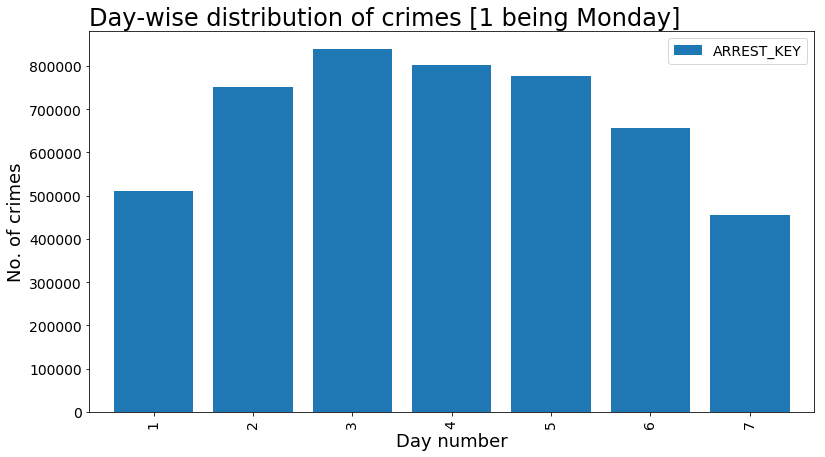

In [49]:
#We group the crimes according to the day, and analyse the day-wise spread of data

dd.groupby('Day').count().plot(y = 'ARREST_KEY', 
                                      kind='bar',
                                      figsize=(13,7),
                                      width=0.80,
                                      fontsize=14,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 14})

plt.xlabel('Day number', fontsize=18)
plt.ylabel('No. of crimes', fontsize= 18)
plt.title('Day-wise distribution of crimes [1 being Monday]', loc='left', fontsize=24)

plt.savefig('Fig2.png')

## **c) Hour-wise spread of crimes**

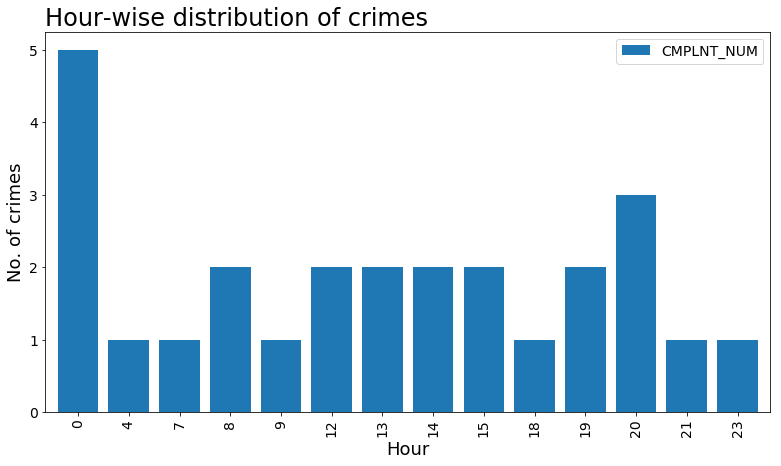

In [50]:
#We group the crimes according to the hours, and analyse the hour-wise spread of data

df2.groupby('hour').count().plot(y = 'CMPLNT_NUM', 
                                      kind='bar',
                                      figsize=(13,7),
                                      width=0.80,
                                      fontsize=14,
                                      colormap='tab20').legend(bbox_to_anchor=(1,1),
                                                               prop={'size': 14})

plt.xlabel('Hour', fontsize=18)
plt.ylabel('No. of crimes', fontsize= 18)
plt.title('Hour-wise distribution of crimes', loc='left', fontsize=24)

plt.savefig('Fig3.png')

#the number of crimes here is drastically less than the previous two bar-charts, because this dataset is for 2017's worth of NYC crime records only

### We now create two different datasets, 'df_top10'  having top 10 crimes data grou'ped together, and 'df_top3', having top 3 crimes' data grouped together

In [51]:
dd[['PD_DESC', 'ARREST_KEY']].groupby(
    ['PD_DESC'], as_index=False).count().sort_values(
    'ARREST_KEY', ascending=False).head(10)

,PD_DESC,ARREST_KEY
182,"MARIJUANA, POSSESSION 4 & 5",422357
20,ASSAULT 3,376000
312,"THEFT OF SERVICES, UNCLASSIFIED",303358
52,"CONTROLLED SUBSTANCE, POSSESSION 7",278080
212,"NY STATE LAWS,UNCLASSIFIED VIOLATION",225678
160,"LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED",188347
317,"TRAFFIC,UNCLASSIFIED INFRACTION",165646
19,"ASSAULT 2,1,UNCLASSIFIED",150823
300,"STOLEN PROPERTY 3,POSSESSION",149876
277,"ROBBERY,UNCLASSIFIED,OPEN AREAS",143263


In [0]:
#we create dataframes of top 10, and top 3 crimes respectively

top10 = dd[['PD_DESC', 'ARREST_KEY']].groupby(
    ['PD_DESC']).count().sort_values('ARREST_KEY', ascending=False)[:10].axes[0].tolist()


top3 = dd[['PD_DESC', 'ARREST_KEY']].groupby(
    ['PD_DESC']).count().sort_values('ARREST_KEY', ascending=False)[:3].axes[0].tolist()

df_top10 = dd[dd['PD_DESC'].isin(top10)].copy()

df_top3 = dd[dd['PD_DESC'].isin(top3)].copy()

In [53]:
df_top10.head()

,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,ARREST_BORO,Latitude,Longitude,Name_of_day,Day,Name_of_month,Month,Year
1,173114463,2017-12-31,"THEFT OF SERVICES, UNCLASSIFIED",OTHER OFFENSES RELATED TO THEFT,Queens,40.769437,-73.910241,Sunday,7,December,12,2017
2,173113513,2017-12-31,"NY STATE LAWS,UNCLASSIFIED VIOLATION",OTHER STATE LAWS,Brooklyn,40.679525,-73.904572,Sunday,7,December,12,2017
3,173113423,2017-12-31,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.763523,-73.987074,Sunday,7,December,12,2017
4,173113421,2017-12-31,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,Manhattan,40.759768,-73.989811,Sunday,7,December,12,2017
5,173130583,2017-12-31,"ROBBERY,UNCLASSIFIED,OPEN AREAS",ROBBERY,Brooklyn,40.684194,-73.916085,Sunday,7,December,12,2017


## **d) Pivot table, showing monthly spread of top 3 crimes, accumulated over the last 10 years**

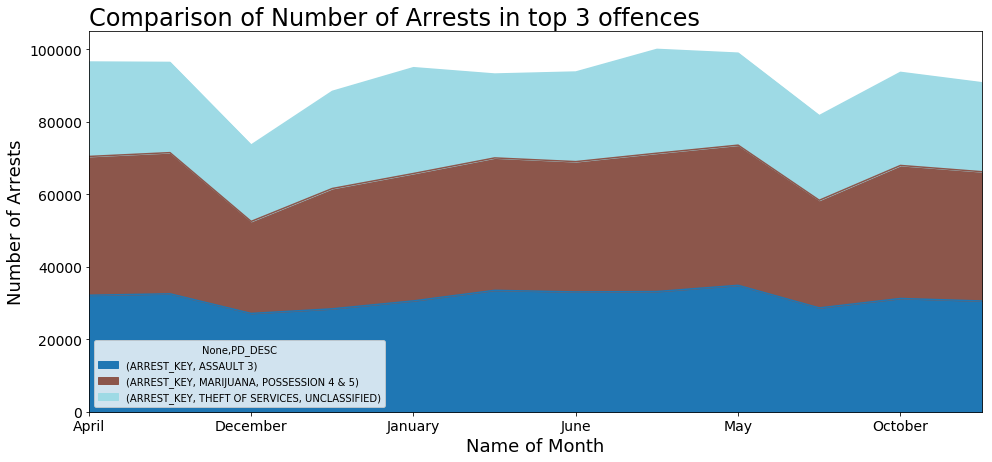

In [54]:
df_top3[['ARREST_KEY', 'PD_DESC', 'Name_of_month']].pivot_table(
    index='Name_of_month', 
    columns='PD_DESC', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(16, 7),
                               fontsize=14,
                               colormap='tab20')

plt.xlabel('Name of Month', fontsize=18)
plt.ylabel('Number of Arrests', fontsize=18)
plt.title('Comparison of Number of Arrests in top 3 offences', loc='left', fontsize=24)

plt.savefig('Fig4.png')

## **e) Pivot table, showing day-wise spread of top 3 crimes, accumulated over the last 10 years**

In [1]:
df_top3[['ARREST_KEY', 'PD_DESC', 'Day']].pivot_table(
    index='Day', 
    columns='PD_DESC', 
    fill_value=0, 
    aggfunc='count').plot(kind='area',
                          stacked=True,
                          figsize=(16, 7),
                               fontsize=14,
                               colormap='tab20')

plt.xlabel('Day  [1 being Monday]', fontsize=18)
plt.ylabel('Number of Arrests', fontsize=18)
plt.title('Comparison of Number of Arrests in top 3 offences', loc='left', fontsize=24)

plt.savefig('Fig5.png')

NameError: ignored

# **4. Web scraping, for data about the top venues to visit in New York City**

In [0]:
#Web scrapping for top 30 venues to visit in NYC



top=requests.get("https://foursquare.com/explore?mode=url&ne=40.822383%2C-73.841&q=Top%20Picks&sw=40.666056%2C-74.129047")

soup = BeautifulSoup(top.content, 'html.parser')

top_venues = soup.find_all('div', class_='venueDetails')

top_venues

client_id='ORP22GET0WVQVZB0GHJ2FQUOHHYTO05DJUSY5JUIVUPGFOWT'
client_secret='L2T2POBBU5LT2WUP03M23IQLO5CSBYIAF0WUTW01HETGC3YP'
version='20180604'



In [0]:
#these are the columns that we'll use to store data about the top venues
venue_columns = ['id', 
                 'score', 
                 'category', 
                 'name', 
                 'address',
                 'postalcode',
                 'city',
                 'href', 
                 'latitude', 
                 'longitude']


df_top_venues = pd.DataFrame(columns=venue_columns)



for venuex in top_venues:
    
    # Extract the available attributes
    venue_name = venuex.find(target="_blank").get_text()
    venue_score = venuex.find(class_="venueScore positive").get_text()
    venue_cat = venuex.find(class_="categoryName").get_text()
    venue_href = venuex.find(class_="venueName").h2.a['href']
    venue_id = venue_href.split('/')[-1]
        
    # Contruct the FourSquare venue API URL
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id,
                                                                                              client_id,
                                                                                              client_secret,
                                                                                              version)
    
    # Request the venue data
    result = requests.get(url).json()
        
    # Get the properly formatted address and the latitude and longitude
    try:
      venue_address = result['response']['venue']['location']['address']
      venue_postalcode = result['response']['venue']['location']['postalCode']
      venue_city = result['response']['venue']['location']['city']
      venue_latitude = result['response']['venue']['location']['lat']
      venue_longitude = result['response']['venue']['location']['lng']
    
    except:
      continue
      
      
    # Add the venue to the top venues dataframe
    df_top_venues = df_top_venues.append({'id': venue_id,
                                          'score': venue_score,
                                          'category': venue_cat,
                                          'name': venue_name,
                                          'address': venue_address,
                                          'postalcode': venue_postalcode,
                                          'city': venue_city,
                                          'href': venue_href,
                                          'latitude': venue_latitude,
                                          'longitude': venue_longitude},ignore_index=True)

In [59]:
df_top_venues

,id,score,category,name,address,postalcode,city,href,latitude,longitude
0,412d2800f964a520df0c1fe3,9.7,Park,Central Park,59th St to 110th St,10028,New York,/v/central-park/412d2800f964a520df0c1fe3,40.784083,-73.964853
1,430d0a00f964a5203e271fe3,9.7,Park,Brooklyn Bridge Park,Main St,11201,Brooklyn,/v/brooklyn-bridge-park/430d0a00f964a5203e271fe3,40.702282,-73.996456
2,4ec0a81fb6341cd41f1ef402,9.6,Theater,Minskoff Theatre,1515 Broadway,10036,New York,/v/minskoff-theatre/4ec0a81fb6341cd41f1ef402,40.757389,-73.985537
3,4a468cd9f964a52015a91fe3,9.6,Field,Long Meadow,Prospect Park,11215,Brooklyn,/v/long-meadow/4a468cd9f964a52015a91fe3,40.668758,-73.970304
4,4ed6adfce5fabbd89f617d4f,9.6,Trail,Hudson River Greenway Running Path,Hudson River Greenway,10282,New York,/v/hudson-river-greenway-running-path/4ed6adfc...,40.732552,-74.010580
5,43222200f964a5209c271fe3,9.6,State / Provincial Park,Gantry Plaza State Park,474 48th Ave,11109,Queens,/v/gantry-plaza-state-park/43222200f964a5209c2...,40.746558,-73.958051
6,42377700f964a52024201fe3,9.6,Scenic Lookout,Brooklyn Heights Promenade,Columbia Heights,11201,Brooklyn,/v/brooklyn-heights-promenade/42377700f964a520...,40.698462,-73.996707
7,3fd66200f964a520d7f11ee3,9.6,Park,Bryant Park,E 42nd St,10018,New York,/v/bryant-park/3fd66200f964a520d7f11ee3,40.753621,-73.983265
8,427c0500f964a52097211fe3,9.6,Art Museum,Metropolitan Museum of Art,1000 5th Ave,10028,New York,/v/the-metropolitan-museum-of-art/427c0500f964...,40.779729,-73.963416
9,4b240a1ff964a520b25f24e3,9.6,Park,Hudson River Park,West St,10011,New York,/v/hudson-river-park/4b240a1ff964a520b25f24e3,40.733487,-74.010506


In [0]:
df_top_venues.to_csv("Top_venues.csv", index=False)

In [0]:
df_crimes = pd.read_csv("crimes10yrs (1).csv")



df_top_venues = pd.read_csv("Top_venues (1).csv")


### Now, we find data about the restaurants near our top venues

In [0]:
# The column names for the restaurants dataframe
restaurants_columns = ['id',
                       'score', 
                       'category', 
                       'categoryID', 
                       'name', 
                       'address',
                       'postalcode',
                       'city',
                       'latitude',
                       'longitude', 
                       'venue_name', 
                       'venue_latitude',
                       'venue_longitude']

# Create the empty top venues dataframe
df_restaurant = pd.DataFrame(columns=restaurants_columns)

# Create a list of all the top venue latitude and longitude
top_venue_lngs = df_top_venues['longitude'].values

# Create a list of all the top venue names
top_venue_names = df_top_venues['name'].values

# Iterate over each of the top venues
# The venue name, latitude and longitude are passed to the loop
top_venue_lats = df_top_venues['latitude'].values

In [0]:
cid='OGFNRP2HYK2MPI2JYC133ASKSUABS3QU4HQOUFGE1XPGFHCD'
csecret='YFCOG5FTDNBWUTO4CVE1M5LSV3JZWFC0LZJR3H5BR4IR3BR0'

In [0]:
for ven_name, ven_lat, ven_long in zip(top_venue_names, top_venue_lats, top_venue_lngs):
    
    # Configure additional Search parameters
    # This is the FourSquare Category Id for all food venues
    categoryId = '4d4b7105d754a06374d81259'
    radius = 500
    limit = 50
    
    # Contruct the FourSquare search API URL
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
        cid,
        csecret,
        ven_lat,
        ven_long,
        '20180604',
        categoryId,
        radius,
        limit)
    
    # Make the search request
    results = requests.get(url).json()
    
    
    
    # Want a good selection of Restaurents
    # If less than 10 are returned ignore
    if len(results['response']['venues']) < 10:
        continue
        
    # Populate the new dataframe with the list of restaurants
    # Get the values for each Restaurant from the JSON
    for restaurant in results['response']['venues']:
      try:
        # Sometimes the Venue JSON is missing data. If so ignore and continue
        
        # Get location details
        rest_id = restaurant['id']
        rest_category = restaurant['categories'][0]['pluralName']
        rest_categoryID = restaurant['categories'][0]['id']
        rest_name = restaurant['name']
        rest_address = restaurant['location']['address']
        rest_postalcode = restaurant['location']['postalCode']
        rest_city = restaurant['location']['city']
        rest_latitude = restaurant['location']['lat']
        rest_longitude = restaurant['location']['lng']
        
        rest_url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
                rest_id, 
                cid,
                csecret,
                '20180604')
        resultf = requests.get(rest_url).json()
        rest_score = resultf['response']['venue']['rating']
        # Add the restaurant details to the datafram
        df_restaurant = df_restaurant.append({'id': rest_id,
                                           'score': rest_score,
                                            'category': rest_category,
                                            'categoryID': rest_categoryID,
                                            'postalcode': rest_postalcode,
                                            'name': rest_name,
                                            'address': rest_address,
                                            'city': rest_city,
                                            'latitude': rest_latitude,
                                            'longitude': rest_longitude,
                                            'venue_name': ven_name,
                                            'venue_latitude': ven_lat,
                                            'venue_longitude': ven_long}, ignore_index=True)
            
        # If there are any issue with a restaurant ignore and continue
      except:
            continue

In [19]:
df_restaurant.tail()

,id,score,category,categoryID,name,address,postalcode,city,latitude,longitude,venue_name,venue_latitude,venue_longitude
451,4a006e57f964a5207e701fe3,8.0,Italian Restaurants,4bf58dd8d48988d110941735,Gabriel's,11 W 60th St,10023,New York,40.769095,-73.982720,Metropolitan Opera,40.772742,-73.984401
452,589bb0fddfa6ff5e1dc8649f,9.0,Vegetarian / Vegan Restaurants,4bf58dd8d48988d1d3941735,Orchard Grocer,78 Orchard St,10002,New York,40.717847,-73.990358,Metrograph,40.714999,-73.991035
453,57d59a77cd1065b75e80d0a6,9.2,Cafés,4bf58dd8d48988d16d941735,Gotan,258 Wythe Ave,11249,Brooklyn,40.717006,-73.963086,Nitehawk Cinema,40.716183,-73.962420
454,58195606fa17e5341d8d8e7d,8.9,New American Restaurants,4bf58dd8d48988d157941735,Sunday In Brooklyn,348 Wythe Ave,11249,Brooklyn,40.714205,-73.965224,Nitehawk Cinema,40.716183,-73.962420
455,548c7da0498ea6aa0e8e5a1d,9.1,Salad Places,4bf58dd8d48988d1bd941735,sweetgreen,162 N 4th St,11211,Brooklyn,40.715804,-73.959234,Nitehawk Cinema,40.716183,-73.962420


In [0]:
df_restaurant.to_csv("Restaurant.csv", index=False)

In [17]:
# Verify the shape of the restaurants dataframe
df_restaurant.shape

(456, 13)

In [52]:

# Describe the score to see if there is nuch variance in the values
df_restaurant.score.describe()

count    534.000000
mean       7.996067
std        0.915062
min        5.100000
25%        7.500000
50%        8.200000
75%        8.700000
max        9.600000
Name: score, dtype: float64

In [53]:
# How many unique restaurant categories are there
df_restaurant.category.nunique()

85

In [54]:
# What arethe top 10 most frequently occuring restaurant types
df_restaurant.groupby('category')['name'].count().sort_values(ascending=False)[:10]

category
Coffee Shops            73
American Restaurants    39
Italian Restaurants     38
Bakeries                34
Pizza Places            27
Cafés                   22
Diners                  15
Burger Joints           14
Donut Shops             14
Juice Bars              13
Name: name, dtype: int64

In [55]:
# Which restaurants have to highest average score
df_restaurant.groupby('category')['score'].mean().sort_values(ascending=False)[:10]

category
Bookstores              9.40
Fish Markets            9.30
Bubble Tea Shops        9.20
Tapas Restaurants       9.10
Clothing Stores         9.10
Steakhouses             9.10
Taco Places             9.06
Gift Shops              9.00
Fried Chicken Joints    8.90
Candy Stores            8.85
Name: score, dtype: float64

# **5. Visualisation of all the data we have collected so far, on a map**

In [56]:
#We load this dataframe d4 for crime record of 2017, as crime record of the 10 years of data can't be visualised on folium as it doesn't support >1000 markers

col_1=['CMPLNT_NUM','PD_DESC','Latitude','Longitude']

df4=pd.read_csv('NYC_crime.csv', usecols=col_1)

df4

,CMPLNT_NUM,PD_DESC,Latitude,Longitude
0,403250906,"SEXUAL ABUSE 3,2",40.814850,-73.956682
1,235290134,"HARASSMENT,SUBD 3,4,5",40.737857,-74.008182
2,563999853,ASSAULT 3,40.716970,-73.995622
3,877956688,"SEXUAL ABUSE 3,2",40.800694,-73.941109
4,505910152,AGGRAVATED HARASSMENT 2,40.802640,-73.947075
5,748658209,"FRAUD,UNCLASSIFIED-FELONY",40.849627,-73.930743
6,849426894,SEXUAL ABUSE,40.828851,-73.943834
7,337642706,"IMPERSONATION 1, POLICE OFFICE",40.789004,-73.946558
8,455393595,"SEXUAL ABUSE 3,2",40.815732,-73.945420
9,546531997,"LARCENY,PETIT FROM AUTO",40.836194,-73.946112


In [0]:
df4.to_csv("crimes1yr-lekin.csv", index=False)

### First, a visualisation of all the top venues, and locations where crimes took place in NYC in 2017

In [60]:
#New York Top Venues and location of crimes


address='New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")

location= geolocator.geocode(address)
latitude=location.latitude
longitude= location.longitude


NY_map6 = folium.Map(location=[latitude, longitude], zoom_start=11, width=850, height=600)

for lat, lng, name in zip(df4.Latitude, df4.Longitude, df4.PD_DESC):
  folium.Marker(
    [lat,  lng],
    popup=name,
    icon=folium.Icon(color='red',icon='warning-sign'),
).add_to(NY_map6)

for lat, lng, name in zip(df_top_venues.latitude, df_top_venues.longitude, df_top_venues.name):
  folium.Marker(
    [lat,  lng],
    popup=name,
    icon=folium.Icon(color='blue',icon='star'),
).add_to(NY_map6)
  
  
NY_map6  

### A Heat map for all the crimes that took place in NYC in 2017

In [62]:
#CircleMarker and HeatMap doesn't work for as many data points as our main dataframe dd had, so we had to visualise using df3 (having data for 1 year)

names=['CMPLNT_NUM', 'OFNS_DESC', 'Latitude', 'Longitude']
df3=pd.read_csv('NYC_crime.csv', usecols=names)


from folium import plugins
from folium.plugins import HeatMap

NYC_heat = folium.Map(location=[latitude, longitude], zoom_start=12, width=850, height=600) 

heat_data = [[row['Latitude'], 
              row['Longitude']] for index, row in df3.iterrows()]


HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=15,
        blur=20,
        gradient=None,
        overlay=True).add_to(NYC_heat)

# Display the map
NYC_heat

In [0]:
#cleaning the data, so that the correct names are displayed

df_crimes=dd.copy()

df_top_venues['name'] = df_top_venues['name'].str.replace("'",'')
df_top_venues['name'] = df_top_venues['name'].str.replace("&",' and ')
df_top_venues['name'] = df_top_venues['name'].str.replace(",",'')

df_restaurant['name'] = df_restaurant['name'].str.replace("'",'')
df_restaurant['name'] = df_restaurant['name'].str.replace("&",' and ')
df_restaurant['name'] = df_restaurant['name'].str.replace(",",'')

In [0]:
#dataframe with top venues having restaurants nearby

top_venues_list = df_restaurant.venue_name.unique().tolist()

In [0]:
# only use those venues which are in top_venues_list
df_top_venues = df_top_venues[df_top_venues['name'].isin(top_venues_list)]

# Take just the top 10 venues sorted by score
df_top10_venues = df_top_venues.sort_values('score', ascending=False)[:10]

# Create a list of the top 10 venues names
top10_venues_list = df_top10_venues.name.tolist()

# Finally filter the Restaurants data frame to include only the top 10 venues
df_restaurant = df_restaurant[df_restaurant['venue_name'].isin(top10_venues_list)]

df_restaurant.reset_index(inplace=True)

In [0]:
# We create a list of the 2 most commonly occuring crimes
top_two_crimes = df_crimes[['PD_DESC', 'ARREST_KEY']].groupby(
    ['PD_DESC']).count().sort_values('ARREST_KEY', ascending=False)[:2].axes[0].tolist()

# Now, we create a smaller DataFrame of only the top two crimes
df_crimes = df_crimes[df_crimes['PD_DESC'].isin(top_two_crimes)]
df_crimes.reset_index(inplace=True)
df_crimes.drop('index', inplace=True, axis=1)

## First venue to be analysed - Central Park

The rest of the data cleaning and visualisation is done purely with Central Park in mind, as a venue

In [0]:
X=df_top10_venues.iloc[0]['latitude'] #latitude of Central Park
Y=df_top10_venues.iloc[0]['longitude'] #longitude of Central Park

In [0]:
dist=[]

import geopy.distance

c1=(X,Y)

for clat, clong in zip(df_crimes.Latitude, df_crimes.Longitude):
  c2=(clat, clong)
  d= geopy.distance.vincenty(c1, c2).km
  dist.append(d)

In [0]:
df_crimes_venue = df_crimes.copy()
df_crimes_venue['dist'] = dist  #new dataframe, containing a column having distance of each crime from Central Park

In [114]:
#these are the number of crimes happening within 700 metres of Central Park

flag=0

for c in dist:
  if c<0.7:
    flag=flag+1
  
print (flag)

943


In [0]:
#keep only data of those crimes that occur within 700m of Central Park
df_crimes_venue = df_crimes_venue[df_crimes_venue['dist'] <= 0.7]

In [0]:
# Dataframe of the restaurants associated with Central Park
df_rest_venue = df_restaurant[df_restaurant.venue_name == 'Central Park'].copy()

# Sort restaurants on the basis of score
df_rest_venue.sort_values('score', ascending=False, inplace=True)

### Heat Map of crimes around Central Park, along with the top 10 restaurants around it

In [125]:
# create map focused on Central Park
CP_heatmap = folium.Map(location=[X, Y], zoom_start=16, height=550, width=750) 

# make out list of latitudes and longitudes associated with the crimes occuring nearby
heat_data = [[row['Latitude'], 
              row['Longitude']] for index, row in df_crimes_venue.iterrows()]

# Plot crimes as a heatmap
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(CP_heatmap)

#Plot venue
folium.Marker(
    location=[X, Y],
    popup='Central Park',
    icon=folium.Icon(color='red', icon='star')
).add_to(CP_heatmap)

# Plot the Top 10 Restaurants
for row in df_rest_venue[:10].itertuples():
    popup_text = '<h4>' + row.name + '</h4>'
    popup_text = popup_text + '<h5>' + row.category + '</h5>'
    popup_text = popup_text + '<b>Score: </b>' + str(row.score)
    popup = folium.Popup(popup_text)
    folium.Marker([row.latitude, row.longitude], 
                  popup=popup,
                  icon=folium.Icon(color='blue', icon='thumbs-up')
                 ).add_to(CP_heatmap)



CP_heatmap

In [122]:
df_top10_venues

,id,score,category,name,address,postalcode,city,href,latitude,longitude
0,412d2800f964a520df0c1fe3,9.7,Park,Central Park,59th St to 110th St,10028,New York,/v/central-park/412d2800f964a520df0c1fe3,40.784083,-73.964853
1,430d0a00f964a5203e271fe3,9.7,Park,Brooklyn Bridge Park,Main St,11201,Brooklyn,/v/brooklyn-bridge-park/430d0a00f964a5203e271fe3,40.702282,-73.996456
6,42377700f964a52024201fe3,9.6,Scenic Lookout,Brooklyn Heights Promenade,Columbia Heights,11201,Brooklyn,/v/brooklyn-heights-promenade/42377700f964a520...,40.698462,-73.996707
10,59580ce6db1d8148fee3d383,9.6,Tacos,Los Tacos No. 1,229 W 43rd St,10036,New York,/v/los-tacos-no-1/59580ce6db1d8148fee3d383,40.757134,-73.987536
9,4b240a1ff964a520b25f24e3,9.6,Park,Hudson River Park,West St,10011,New York,/v/hudson-river-park/4b240a1ff964a520b25f24e3,40.733487,-74.010506
7,3fd66200f964a520d7f11ee3,9.6,Park,Bryant Park,E 42nd St,10018,New York,/v/bryant-park/3fd66200f964a520d7f11ee3,40.753621,-73.983265
8,427c0500f964a52097211fe3,9.6,Art Museum,Metropolitan Museum of Art,1000 5th Ave,10028,New York,/v/the-metropolitan-museum-of-art/427c0500f964...,40.779729,-73.963416
5,43222200f964a5209c271fe3,9.6,State / Provincial Park,Gantry Plaza State Park,474 48th Ave,11109,Queens,/v/gantry-plaza-state-park/43222200f964a5209c2...,40.746558,-73.958051
4,4ed6adfce5fabbd89f617d4f,9.6,Trail,Hudson River Greenway Running Path,Hudson River Greenway,10282,New York,/v/hudson-river-greenway-running-path/4ed6adfc...,40.732552,-74.010580
3,4a468cd9f964a52015a91fe3,9.6,Field,Long Meadow,Prospect Park,11215,Brooklyn,/v/long-meadow/4a468cd9f964a52015a91fe3,40.668758,-73.970304


## Second Venue to be analysed- Hudson River Park

In [0]:
X=40.733487 #latitude of Hudson River Park
Y=-74.010506 #longitude of Hudson River Park

In [0]:
dist=[]

import geopy.distance

c1=(X,Y)

for clat, clong in zip(df_crimes.Latitude, df_crimes.Longitude):
  c2=(clat, clong)
  d= geopy.distance.vincenty(c1, c2).km
  dist.append(d)

In [175]:
#these are the number of crimes happening within 460 metres of Hudson River Park

flag=0

for c in dist:
  if c<0.150:
    flag=flag+1
  
print (flag)

911


In [0]:
df_crimes_venue = df_crimes.copy()
df_crimes_venue['dist'] = dist  #new dataframe, containing a column having distance of each crime from Hudson River Park

In [0]:
#keep only data of those crimes that occur within 460m of Hudson River Park
df_crimes_venue = df_crimes_venue[df_crimes_venue['dist'] <= 0.150]

In [0]:
# Dataframe of the restaurants associated with Hudson River Park
df_rest_venue = df_restaurant[df_restaurant.venue_name == 'Hudson River Park'].copy()

# Sort restaurants on the basis of score
df_rest_venue.sort_values('score', ascending=False, inplace=True)

### Heat Map of crimes around Hudson River Park, along with the top 10 restaurants around it

In [180]:
# create map focused on Central Park
CP_heatmap = folium.Map(location=[X, Y], zoom_start=16, height=550, width=750) 

# make out list of latitudes and longitudes associated with the crimes occuring nearby
heat_data = [[row['Latitude'], 
              row['Longitude']] for index, row in df_crimes_venue.iterrows()]



# Plot crimes as a heatmap
HeatMap(heat_data,
        min_opacity=0.5,
        max_zoom=18, 
        max_val=1.0, 
        radius=20,
        blur=30,
        gradient=None,
        overlay=True).add_to(CP_heatmap)

#Plot venue
folium.Marker(
    location=[X, Y],
    popup='Hudson River Park',
    icon=folium.Icon(color='red', icon='star')
).add_to(CP_heatmap)

# Plot the Top 10 Restaurants
for row in df_rest_venue[:10].itertuples():
    popup_text = '<h4>' + row.name + '</h4>'
    popup_text = popup_text + '<h5>' + row.category + '</h5>'
    popup_text = popup_text + '<b>Score: </b>' + str(row.score)
    popup = folium.Popup(popup_text)
    folium.Marker([row.latitude, row.longitude], 
                  popup=popup,
                  icon=folium.Icon(color='blue', icon='thumbs-up')
                 ).add_to(CP_heatmap)



CP_heatmap

# 6. Clustering

### Finally, we use K-means clustering on the records of crimes of 2017, and cluster together crimes based on the location.

This is done because in the heatmap as well as map with markers, about the crimes in NYC in 2017, we can clearly see three major segemtation of crimes, over the entire city, based on whether the location is in North NYC, South NYC, or Central NYC. We try to segment the crimes to these 3 clusters.

In [0]:
#two dataframes are used, one for mapping, and one for training the K-means algorithm

lame=['CMPLNT_NUM', 'Latitude', 'Longitude', 'PD_DESC']

df=pd.read_csv("NYC_crime.csv", usecols= lame)

game=['Latitude', 'Longitude']

dfaq=pd.read_csv("NYC_crime.csv", usecols= game)

In [70]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfaq)

# check cluster labels generated for each row in the dataframe
kmeans.labels_ 

array([1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 0, 0, 0,
       1, 0, 1, 1], dtype=int32)

In [0]:
# add clustering labels
df.insert(0, 'Cluster Labels', kmeans.labels_)

In [0]:
#add colors according to labels

colors=['red','blue', 'green']
dic=[]

for i in kmeans.labels_:
  dic.append(colors[i])
  
df['Colourm']=dic  

In [73]:
#Map the dataframe

address='New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")

location= geolocator.geocode(address)
latitude=location.latitude
longitude= location.longitude


NY_map7 = folium.Map(location=[latitude, longitude], zoom_start=11, width=850, height=600)

for lat, lng, name, col in zip(df.Latitude, df.Longitude, df.PD_DESC, df.Colourm):
  folium.Marker(
    [lat,  lng],
    popup=name,
    icon=folium.Icon(color=col,icon='warning-sign'),
).add_to(NY_map7)

  
NY_map7  